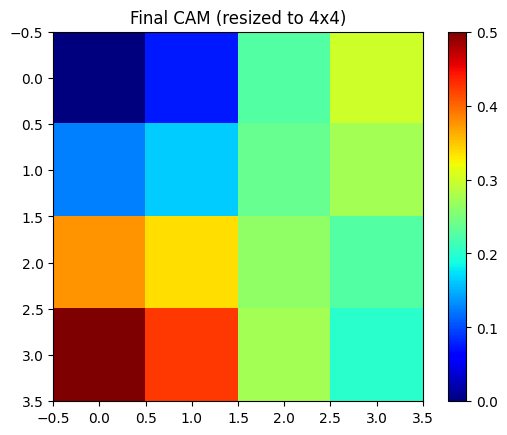

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Giả lập feature maps từ target layer
# Giả sử: batch size = 1, 3 channels, kích thước 2x2
activations = torch.tensor(
    [[
        [[1, 2], [3, 4]],   # Channel 0
        [[0, 1], [1, 0]],   # Channel 1
        [[2, 2], [2, 2]],   # Channel 2
    ]], dtype=torch.float32
)  # Shape: (1, 3, 2, 2)

# Step 2: Giả lập trọng số từ gradient
weights = torch.tensor([[0.2, 0.5, -0.3]])  # Shape: (1, 3)

# Step 3: Nhân trọng số với từng kênh (broadcast)
# Shape sau broadcasting: (1, 3, 1, 1)
weighted_activations = weights[:, :, None, None] * activations  # (1, 3, 2, 2)

# Step 4: Cộng theo channel → CAM
cam = weighted_activations.sum(dim=1)  # Shape: (1, 2, 2)

# Step 5: Áp dụng ReLU
cam = F.relu(cam)

# Step 6: Resize CAM về ảnh gốc (giả sử 4x4)
cam_resized = F.interpolate(cam.unsqueeze(1), size=(4, 4), mode='bilinear', align_corners=False)
cam_resized = cam_resized.squeeze().detach().numpy()  # Shape: (4, 4)

# Step 7: Hiển thị CAM
plt.imshow(cam_resized, cmap='jet')
plt.title("Final CAM (resized to 4x4)")
plt.colorbar()
plt.show()
